### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Импортирую необходимые библиотеки

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from datetime import datetime, timedelta

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

Прочитаю файлы и запишу их в соотв-ие переменные

In [6]:
visits=pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

**Ознакомлюсь с данными**

In [7]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [9]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


В данных есть столбцы с датой и временем (нужно преобразовать). Также названия столбцов начинаются с заглавных букв (нужно преобразовать в нижний регистр и убрать пробелы)

**Проверка на пропуски**

In [10]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [11]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [12]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

Пропусков в данных нет

**Проверка на дубликаты**


In [13]:
visits.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

Дубликатов нет

**Приведение названий столбцов к нижнему регистру**

In [16]:
for i in [visits,orders,costs]:
    i.columns = [x.lower() for x in i.columns]

**Приведу столбцы в стандартный вид**

In [17]:
visits =visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})

In [18]:
orders =orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

In [19]:
for i in [visits,orders,costs]:
    display(i.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

**Изменение формата даты**

In [20]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [21]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [22]:
orders['event_dt']=pd.to_datetime(orders['event_dt'])

In [23]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


In [24]:
for i in [visits,orders,costs]:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Обработка данных завершена, перейду к следующему этапу проекта

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функции решил взять из теор. части.

Напишу функцию для создания пользовательского профиля

Профиль пользователя:
   - id
   - first_visit (datetime)
   - region
   - channel
   - dt (date)
   - month (first day)
   - payer
   - стоимость привлечения
    
    

In [25]:
def get_profiles(visits, orders, costs):
    profiles = (        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'region': 'first', 'channel': 'first', 'device': 'first'})
        .rename(columns={'session_start': 'first_visit'})
        .reset_index()
               )
    
    profiles['dt'] = profiles['first_visit'].dt.date
    profiles['month'] = profiles['first_visit'].astype('datetime64[M]')
    
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

Функция для расчета удержания пользователей

In [26]:
def get_retention(profiles, visits, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(visits[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_visit']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time

Функция для расчета конверсии

In [27]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_visit']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчета пожизненной ценности клиента

In [28]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_visit']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

In [29]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [30]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

In [31]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


In [32]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей (CAC)')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Таким образом, функции определены, перейду к исследовтельскому анализу данных

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Профили пользователей**

In [33]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_visit,region,channel,device,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,United States,FaceBoom,Mac,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,United States,FaceBoom,iPhone,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,France,organic,iPhone,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,Germany,AdNonSense,PC,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,United States,YRabbit,iPhone,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,United States,TipTop,iPhone,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,UK,organic,PC,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,United States,TipTop,iPhone,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,United States,MediaTornado,PC,2019-09-28,2019-09-01,False,0.205714


In [34]:
min_dt, max_dt = profiles['first_visit'].min(), profiles['first_visit'].max()

In [35]:
min_dt, max_dt

(Timestamp('2019-05-01 00:00:41'), Timestamp('2019-10-27 23:59:04'))

Самый ранний пользователь на данном таймфрейме был привлечен первого мая 2019г, самый последний пользователь - 27 окт 2019 г.

**Разбивка пользователей по странам**

In [36]:
profiles.groupby('region').agg({'user_id':'count', 'payer':'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Больше всего пользователей приходит из США, меньше всего из Франции. Доля платящих пользователей в США ~7%, что отражает высокую платежеспособность аудитории. Несомтря на то, что в Англии и Франции количество пользователей почти одинаковое - в Англии платящий пользователей на 2% больше, чем во Франции.

**Разбивка пользователей по утройствам**

In [37]:
profiles.groupby('device').agg({'user_id':'count', 'payer':'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Наиболее платежеспособные пользователи - это владельцы аксессуалов Apple (Mac, iPhone). Доля платящих пользователей в этих категориях составляет ~6% 
Пользователи андроида платят в ~6% случаев. ПОльзователи PC являются не платежеспособной категорией. Лишь 5% из всех пользователей совершали покупки.

**Каналы привлечения пользователей**

In [38]:
profiles.groupby('channel').agg({'user_id':'count', 'payer':'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Топ 4 канала занимают FaceBoom, AdNonSense, lambdaMediaAds, TipTop - из этих каналов больше всего приходит платящих пользователей. Лидером по привлечению является FaceBoom (12% пользователей, которые сделали покупку, привлечено из этого источника).

Наименее эффективный канал привлечения клиентов, где нужно прилагать усилия -это OppleCreativeMedia. 2,7% приходят из него.


Хотя органические покупатели, кто купил продукт, составляют 2% - это хорошо для бизнеса, тк на данный канал не тратиться средств.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

ОБщая сумма на маркетинг

In [39]:
mark_costs = costs['costs'].sum()

In [40]:
mark_costs

105497.30000000002

Общие расходы на маркетинг за данный период составили 105т у.е.

**Распределение трат по источникам**

In [41]:
costs.groupby('channel')[['costs']].sum().sort_values(by = 'costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего потратили на рекламу для TipTop - 54,7т у.е.

на рекламу для FaceBoom в 1,7 раза меньше - 32,4т у.е.

На эти каналы тратиться более 80% бюджета

На остальные источники потратили 5 т у.е. и менее.

Здесь стоит вспомнить о том, что наибольшая доля платящих приходится на канал FaceBoom (12%)(1 место в рейтинге), а на канал TipTop - 9,6% (4 место в рейтинге)

при этом на канал TipTop тратится в 1,7 раза больше чем на FaceBoom.

Предварительно можно сделать вывод, что маркетинговая компания для данного канала не эффективна.

Свою ээфетивность показывает канал AdNonSense. Траты на него стоят на 4 месте, но по доле привлечения платящих пользователей он занимает вторую позицию в рейтинге. При привлеченной из него аудитории 11% совершают покупки.

Предварительно можно сделать вывод, что данный канал может являться точкой роста продаж.

Аналогично можно оценить и RocketSuperAds

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

* Доля платящих всё же считалась в разрезе по каналам, то есть среди всех привлечённых с `FaceBoom` было 12% платящих
* Подобные выводы отлично структурируются маркированными списками, рекомендую </div>

**Визуализация динамики изменения расходов на рекламу по неделям и месяцам**

Добавлю столбец даты в формате datetime, столбец с номером недели и месяца. 

Сгруппирую данные. Заведу переменные funnel_weekly и funnel_monthly (хранят данныые о тратах на рекламу по неделям и месяцам)

In [42]:
costs['date'] = pd.to_datetime(costs['dt'])

In [43]:
costs['week'] = costs['date'].dt.isocalendar().week

In [44]:
funnel_weekly = costs.groupby(['channel', 'week'])[['costs']].sum()

In [45]:
costs['month'] = costs['date'].dt.month

In [46]:
funnel_monthly = costs.groupby(['channel', 'month'])[['costs']].sum()

Построю графики изменения затрат на рекламу

Text(0.5, 1.0, 'Динамика затрат по каналам')

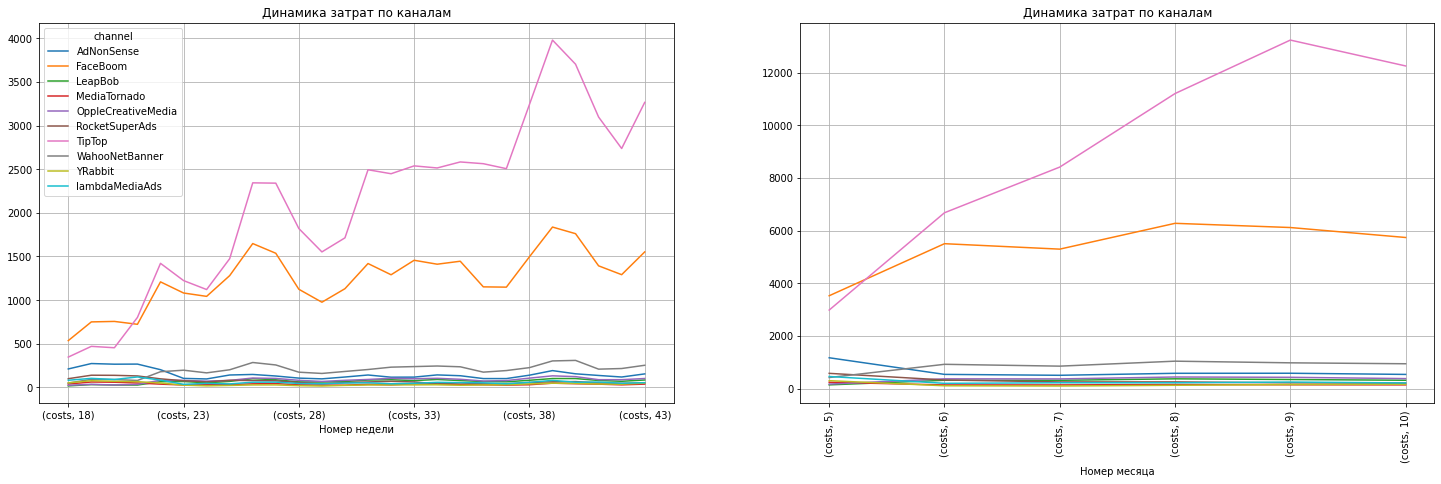

In [47]:
plt.figure(figsize=(25, 7))
funnel_weekly.unstack().T.plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.xlabel('Номер недели')
plt.title('Динамика затрат по каналам')
funnel_monthly.unstack().T.plot(grid=True, legend=False, ax=plt.subplot(1, 2, 2))
plt.xticks(rotation=90)


plt.xlabel('Номер месяца')
plt.title('Динамика затрат по каналам')

Ф целом флуктуация наблюдается у двух каналов привлечения клиентов - это FaceBoom и TipTop. У TipTop наблюдается увеличение затрат на рекламу от месяца к месяцу. Затраты на рекламу в FaceBoom выросли на 1000 уе по сравнению с маем.

В остльных источниках по большому счету динамика отсутсвует.


**Стоимость привлечения пользовтаеля из каждого источника**

Исключим органических пользователей из таблицы, так как их стоимость привлечения равна 0

In [48]:
profiles = profiles.query('channel != "organic"')

In [49]:
gr_by_ch = profiles.groupby('channel').agg({'user_id':'count', 'acquisition_cost':'sum'})

In [50]:
gr_by_ch['cost_of_user'] = gr_by_ch['acquisition_cost']/gr_by_ch['user_id']

In [51]:
gr_by_ch.sort_values(by = 'cost_of_user')

,user_id,acquisition_cost,cost_of_user
channel,,,
LeapBob,8553,1797.60,0.210172
MediaTornado,4364,954.48,0.218717
YRabbit,4312,944.22,0.218975
OppleCreativeMedia,8605,2151.25,0.250000
RocketSuperAds,4448,1833.00,0.412095
WahooNetBanner,8553,5151.00,0.602245
lambdaMediaAds,2149,1557.60,0.724802
AdNonSense,3880,3911.25,1.008054
FaceBoom,29144,32445.60,1.113286


ТАким образом, общая сумма на маркетинг составил 105 т уе. Больше всего средств тратится на канал  TipTop (54т).

Общая динамика расходов на рекламу по разным каналам следующая- 

- сильно выросли расходы на рекламу в TipTop (с 3 до 12 т)
- с ~4 до 6т выросли расходы на рекламу в FaceBoom
- расходы на рекламу в других каналах в целом не изменились

Самые дешевые пользователи приходят из LeapBob. Пришло 8553 пользователя при затратах 1797. Стоимость пользователя 0,2 уе

ТАкже дешевые пользователи из каналов - MediaTornado, YRabbit, OppleCreativeMedia.

Пользователи из AdNonSense и FaceBoom стоят почти 1 уе.

Самые дорогие пользователи - в TipTop. Их стоимость почти в 3 раза превышает пользователей из AdNonSense и FaceBoom

Свою неэффективность показывает канал TipTOp - на него можно сократить рекламный бюджет. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**5.1 Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.**

In [52]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

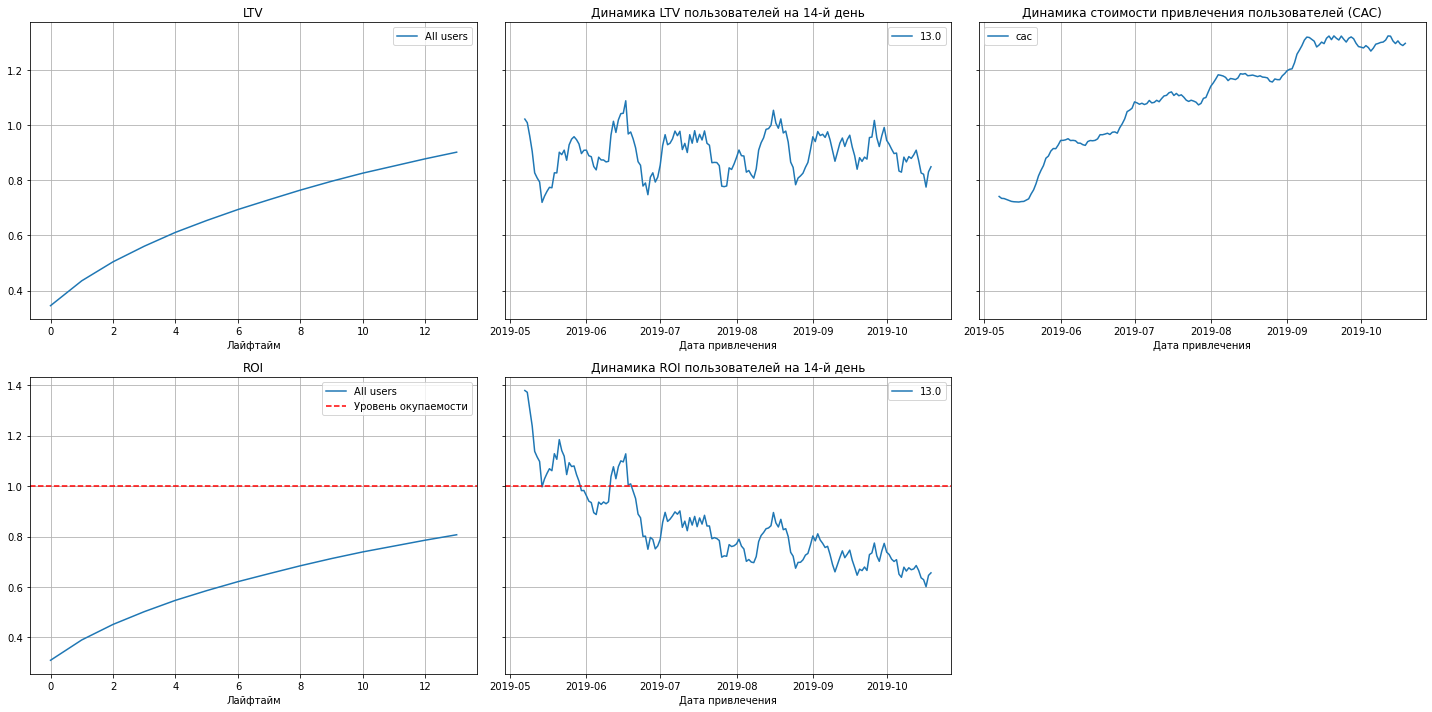

In [53]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)


При скользящем среднем с шириной окна в 7 дней по графикам можно сделать такие выводы:

    - Реклама не окупается. ROI в конце двух недель стремиться к одному, но остается меньше. То есть в течение двух недель пользователи приносят компании чуть меньше денег, чем было потрачено на их привлечение.
    - CAC стабильно растет. Возмонжо, рост затрат на привлечение - определяющий фактор показателя ROI.
    - Стоит отметить динамику ROI на 14 день в каждой группе. Показатель имеет явную тенденцию на снижение. После середины мая произошел резкий спад рентабельности, с середины июля пользователи перестали окупаться на 14 день

**5.2 Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания. (без признака)**

**Разбивка по устройству**

In [54]:
retention_raw, retention,retention_history  = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['device'])

In [55]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions = ['device']
)

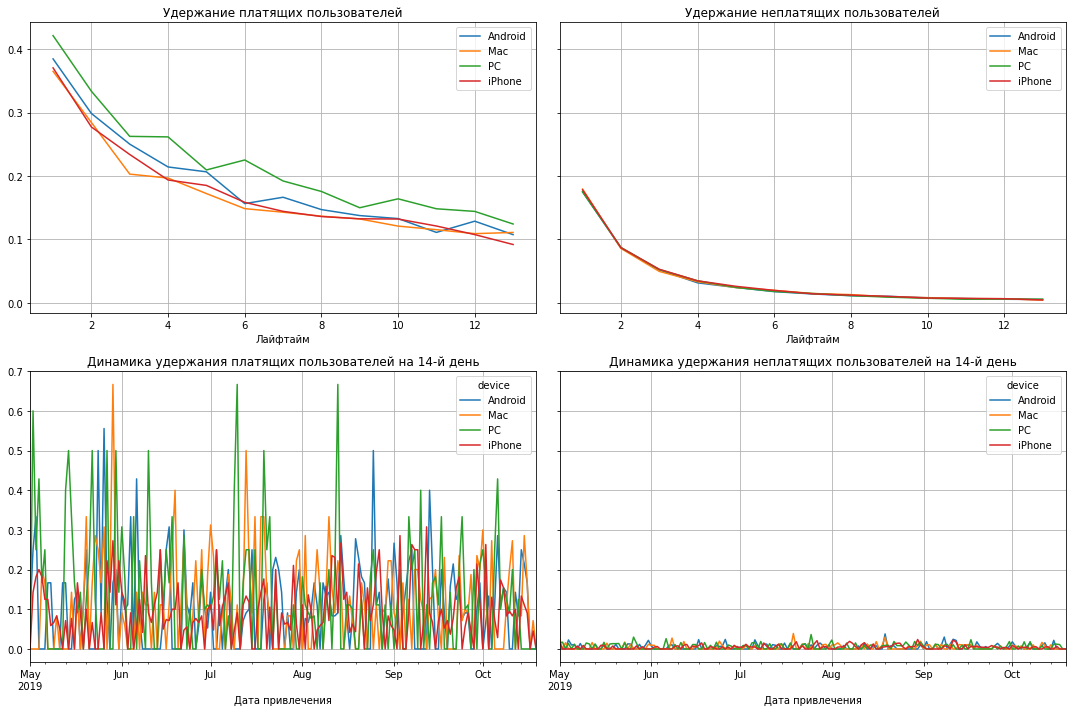

In [56]:
plot_retention(retention, retention_history, 14)

Графики показывают, что пользователи PC имеют показатель удержания через 14 дней после установки приложения стабильно выше пользователей других устройств. 


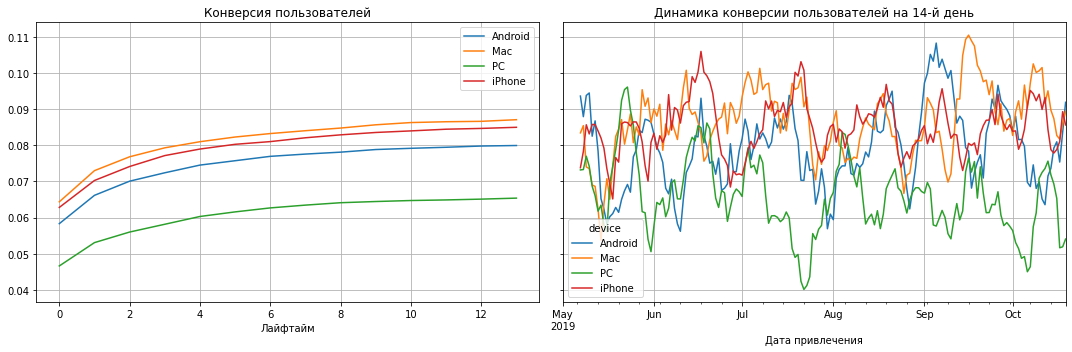

In [57]:
plot_conversion(conversion, conversion_history, 14)


Показатель конверсии у пользователей РС меньше остальных.

**Разбивка по региону**

In [58]:
retention_raw, retention,retention_history  = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['region'])

In [59]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions = ['region']
)

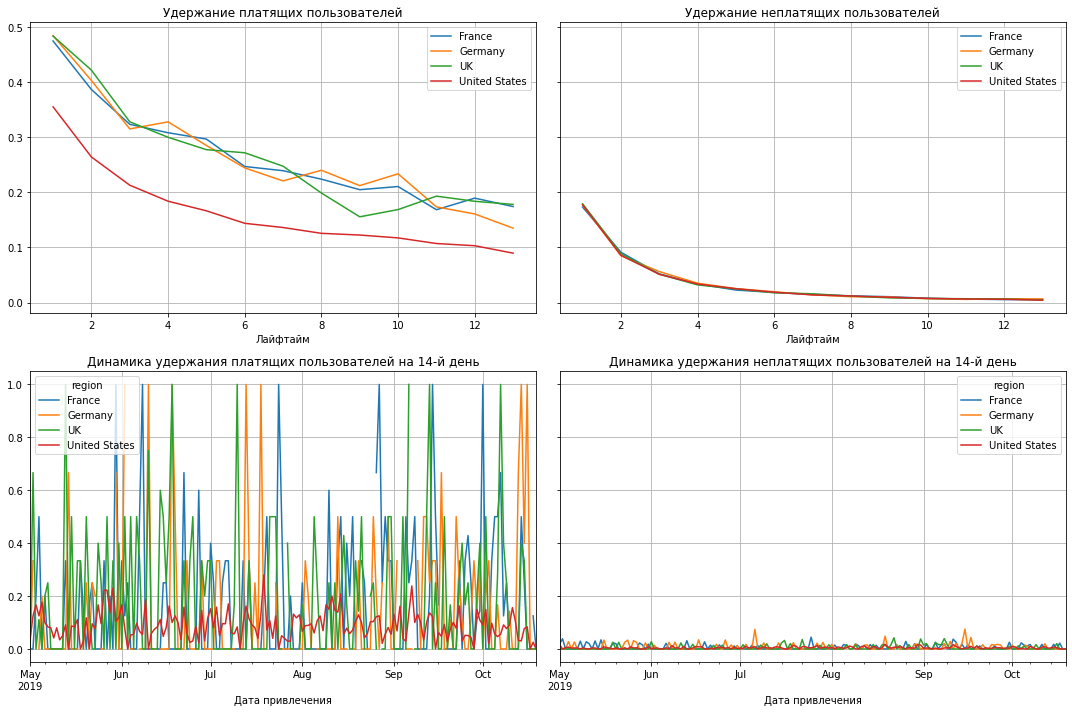

In [60]:
plot_retention(retention, retention_history, 14)

Отличается динамика показателя удержания платящих пользователей из США. Он стабильно ниже чем в др странах

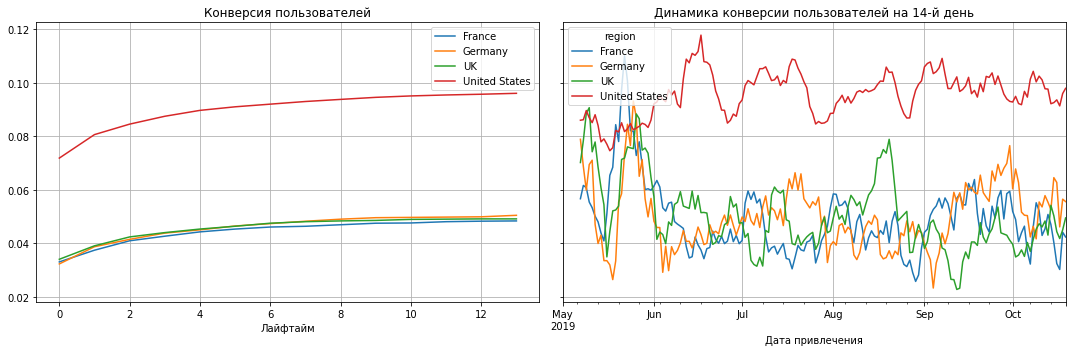

In [61]:
plot_conversion(conversion, conversion_history, 14)

КОнверсия пользователей из США почти вдвое выше конверсии пользователей из других стран

**Разбивка по каналу привлечения**

In [62]:
retention_raw, retention,retention_history  = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['channel'])

In [63]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions = ['channel']
)

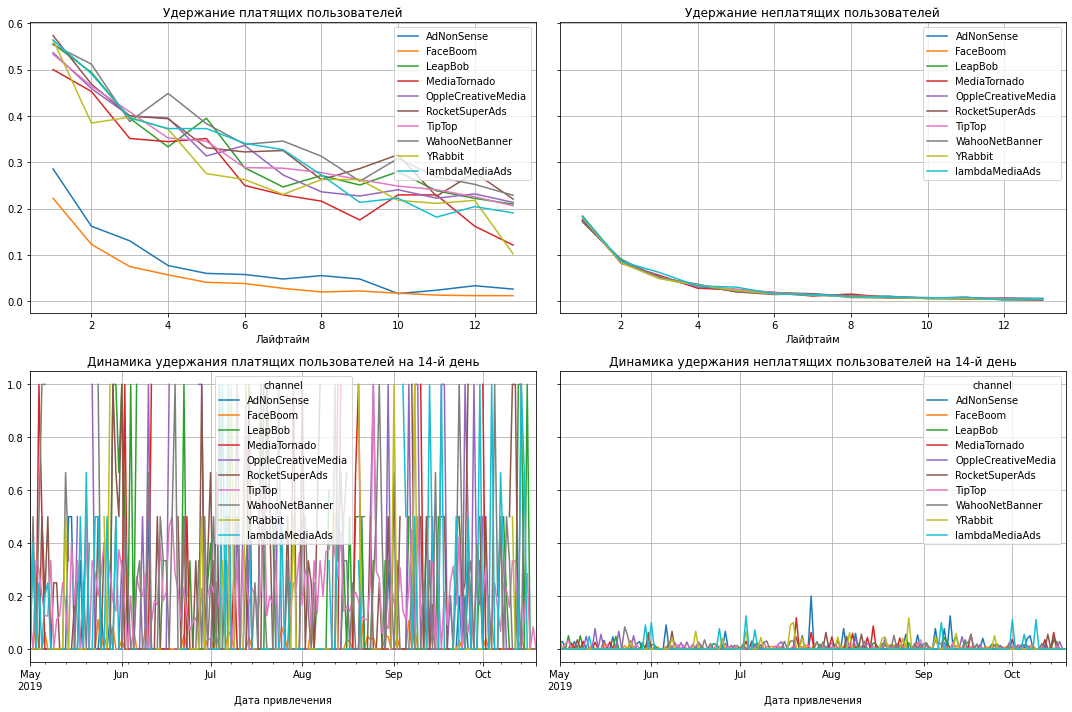

In [64]:
plot_retention(retention, retention_history, 14)

Удержание платящих пользователей из каналов FaceBoom и AdNonSense намного ниже остальных.

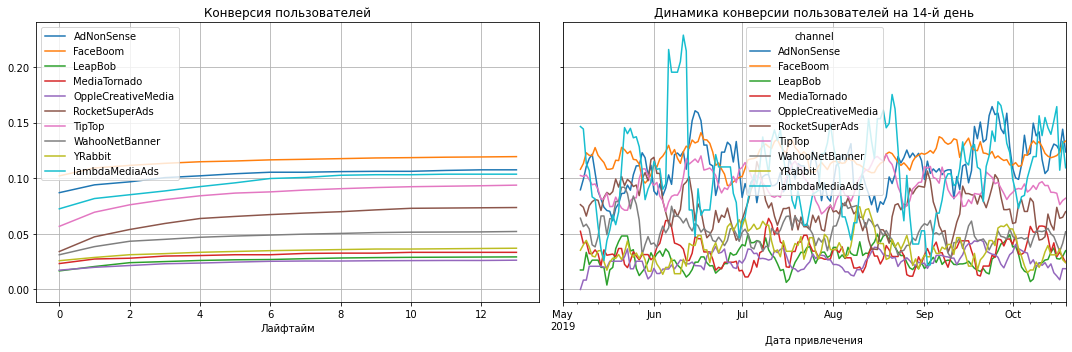

In [65]:
plot_conversion(conversion, conversion_history, 14)

В целом конверсия в разных каналах циклична. Раз в месяц проиходит увеличение показателя конверсии, затем спад

Конверсия пользователей из FaceBoom  - самая высокая

Происходит диссонанс - тк конверсия FaceBoom самая высокая, но удержание самое низкое

**Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**


In [66]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

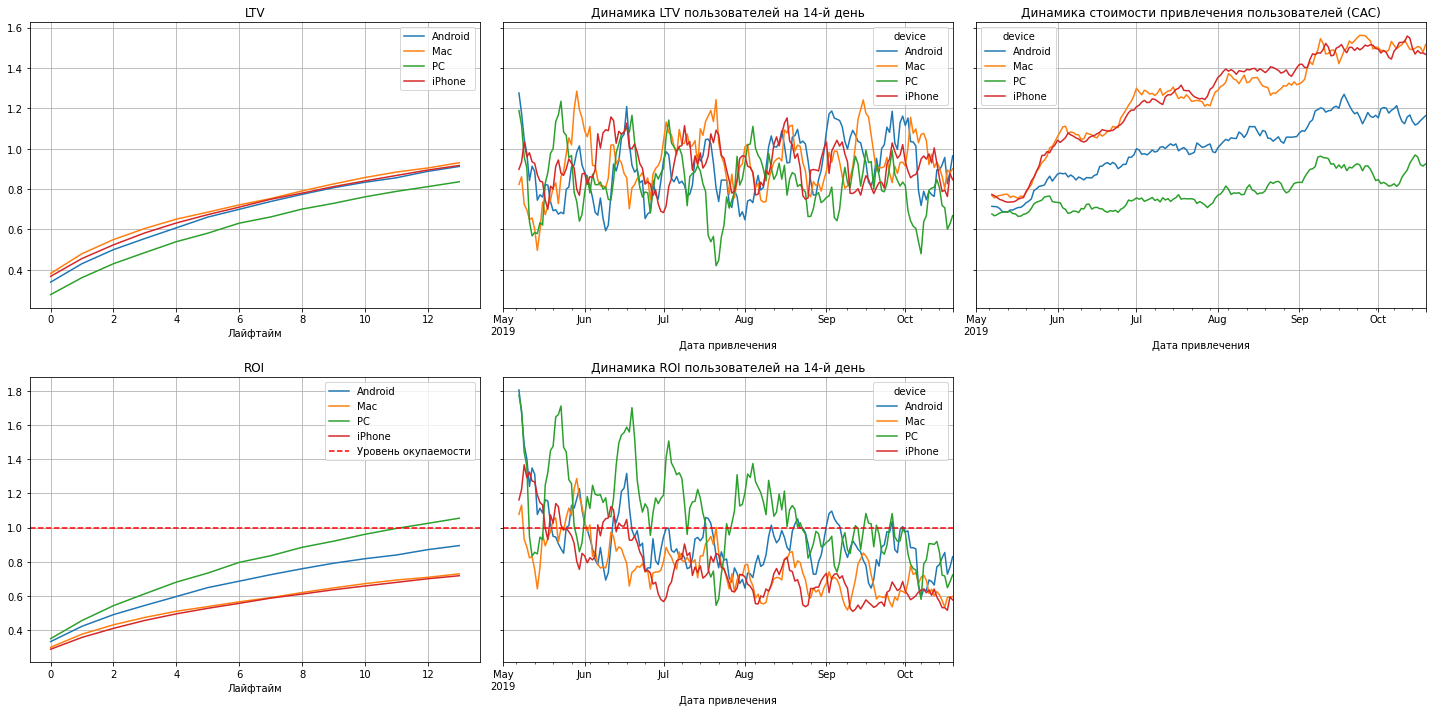

In [67]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)


Стоимость привлечения пользователей на всех устройствах стабильно увеличивается.

Через две недели окупаются только пользователи РС и Android.  Пользователи Apple не окупаются.

Динамика рентабельности на 14 день в целом падает на всех утройствах. Но пользователи РС на 14 день стабильно окупаются.

**Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**


In [68]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

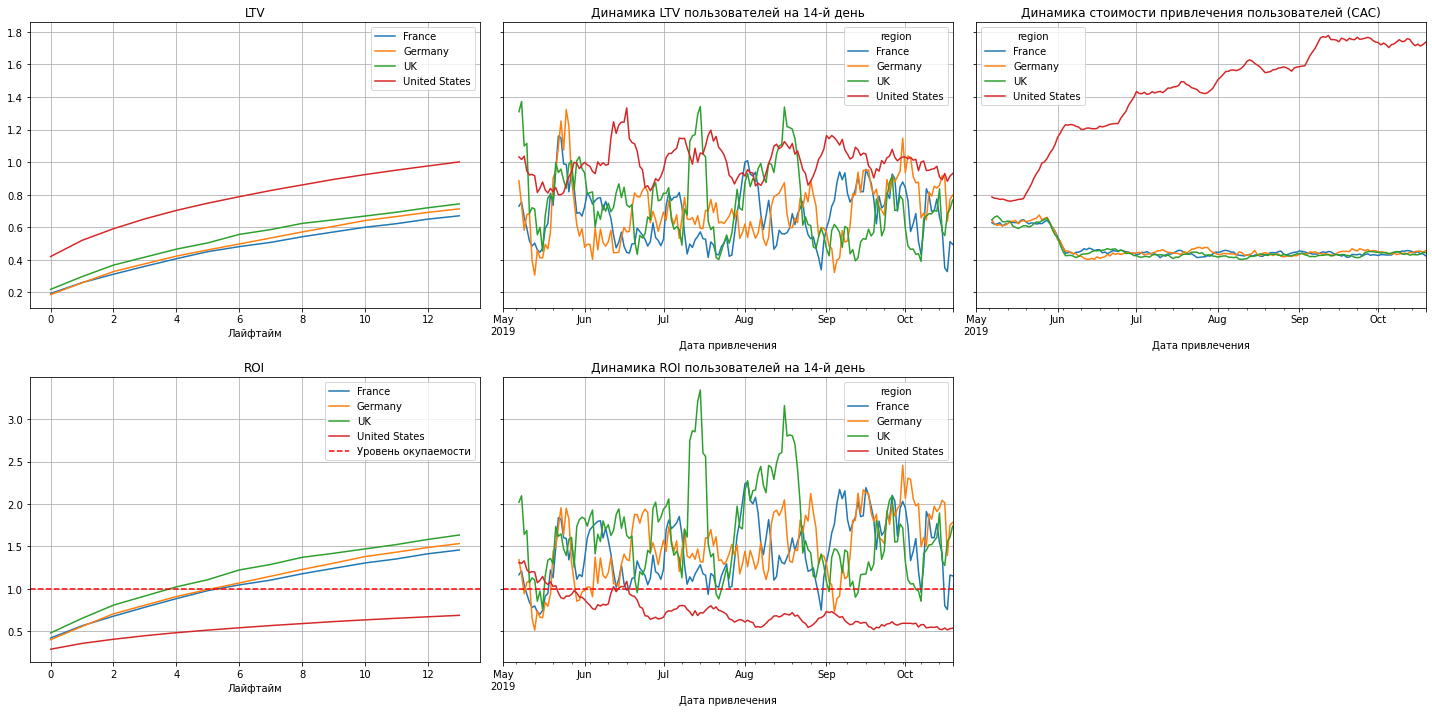

In [69]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)


Динамика стоимости привлечения клиентов из США растет большими темпами, в то время как стоимость привлечения клиентов в других странах остается стабильной.

LTV пользователей из США самый высокий, в США пользователи на 14 день вообще не окупаются. ROI на 14 день после привлечения стабильно снижается.



**Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**


In [70]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

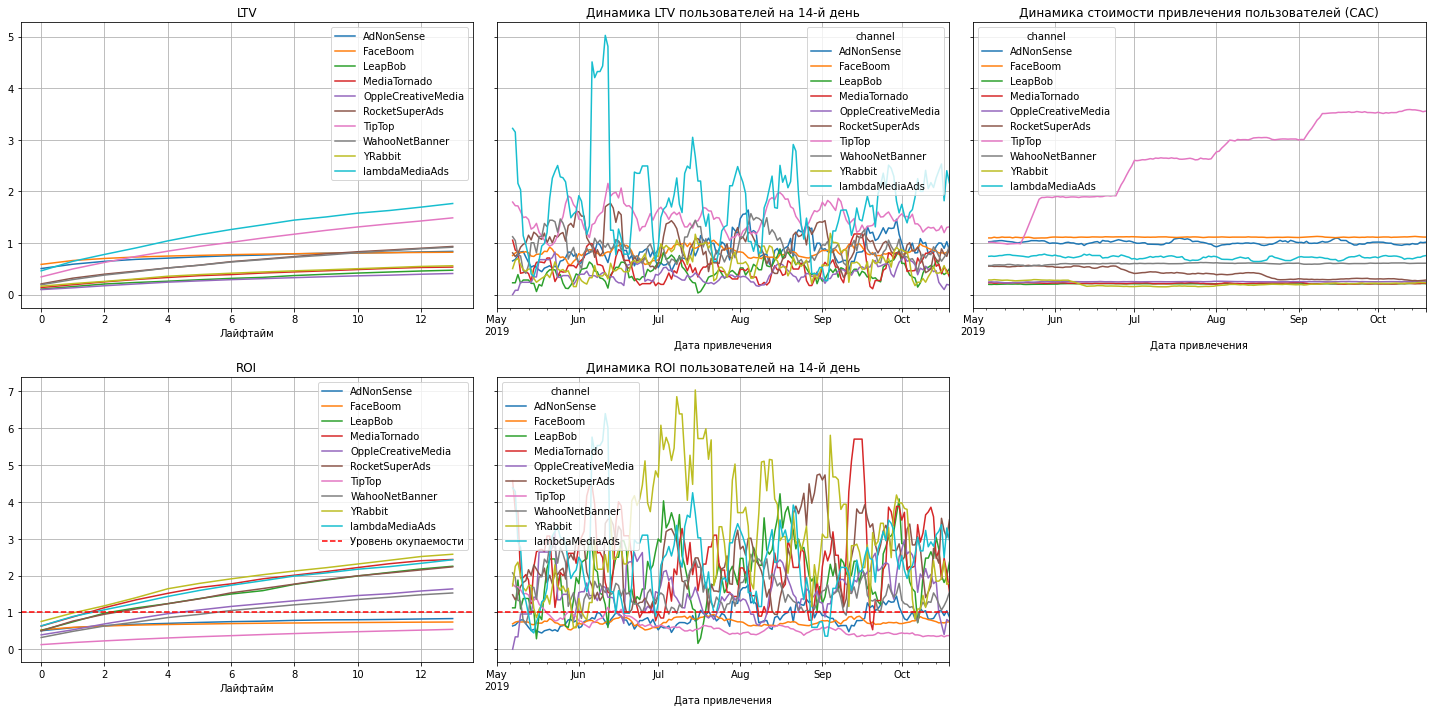

In [71]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

В целом большинство рекламмных каналов показывают свою эффективность и окупаются. Исключением являются три канала - FaceBoom, TopTop, lambdaMediaAds.  


Но у lambdaMediaAds самый большой LTV

РАстет стоимость одного клиента из канала TipTop

**Ответьте на такие вопросы:**
- Окупается ли реклама, направленная на привлечение пользователей в целом?
        - в целом реклама к концу второй недели не окупается.(п 5.1)
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
        - Судя по графикам - США проблемная страна. Каналы TipTop, FaceBoom и AdNonSense  снижают показатели окупаемости. Пользовтаели iPhone и Mac имеют низкие показали удержания
- Чем могут быть вызваны проблемы окупаемости?
        - в таблицах бюджета на привлечение клиентом четко видно, что растет бюджет на привлечение покупаетелей из каналов TipTop, FaceBoom. Но в данных каналах стоимость одного пользователя значительно выше. Есть более дешевые источники трафика.
        
**Вывод**

Стоит обратить внимание на три вещи
- TipTop самый дорогой источник привлечения клиентов.
- Оттуда скорее всего пользвователи из США (что является проблемной страной)
- также было замечено то, что пользователи РС удерживаются значительно лучше. (стоит посмотреть откуда они и исправить рекламную компанию на страну, откуда приходят пользователи данных устройств.\)

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Причины неэффективности привлечения пользователей:**

    - выбран не тот целевой источник привлечения клиентов (продолжается увеличиние трат на эти источники) Деньги тратяться, пользователи не идут оттуда -> эффективность падает
    - Три самых дорогих источника - это TipTop, FaceBoom и AdNonSense. Основная аужитория данных каналов - американцы. Графики подтвердили, что это неэффективные источники + самая неэффективная страна - США.
    
Стоит проанализировать эту ситуацию, почему сочетание канал-США показало свою неэффективность:
- это могут быть сбои в работе устройств (окупаемость по устройствам Mac и iPhone самая низкая)
- события в стране
- целевая аудитория компании - это не пользователи TipTop, но несмотря на это расходы на канал необоснованно увеличивались (хотя канал не показывал свою эффективность)



Возможно, сама реклама в канале FaceBoom была грамотная, привлекала пользователей, но концепция приложения в первые дни не понравилась пользователям, поэтому показатель удержания самый низкий. СТоит проанализировать, что не нравилось пользователям и доработать приложение


**Сформулируйте рекомендации для отдела маркетинга.**

нужно ориентироваться на другие источники привлечения клиентов (LeapBob, MediaTornado, YRabbit, OppleCreativeMedia)

обратить внимание на пользователей РС, так как удержание у них самое высокое, но конверсия низкая (стоит поработать над рекламной кампанией), также не забывать про пользователей Андроид

обратить внимание на рынки Великобритании и Германии, там может быть точка роста

LTV канала lambdaMediaAds самый высокий, но рентабельность низкая. Это говорит о том, что источник привлечения - неэффективен. ВОзможно, стоит оптимизировать затраты на привлечение пользователей (поменять источник или рекламную кампанию)